In [1]:
%%capture
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
from tqdm import tqdm as tqdm
from collections import defaultdict
from collections import Counter
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

In [15]:
import os
import cv2
import PIL.Image as Image

In [2]:
import ai2thor.controller
import pickle
import json


controller = ai2thor.controller.Controller()

In [24]:
def get_reachable_pos(scene_id):
    controller.reset(scene_id)
    meta_event = controller.step(dict(action='Initialize', gridSize=0.25))
    meta_event = controller.step(dict(action='GetReachablePositions'))
    return meta_event.metadata['reachablePositions']

In [25]:
scene_id = 'FloorPlan_RVal2_2'

In [26]:
all_orig_pos = get_reachable_pos(scene_id)

In [107]:
360 /30

12.0

In [109]:
from copy import deepcopy


def take_image_w_md(event):
    all_md = event.metadata
    relevant_md = {
        'cameraPosition': all_md['cameraPosition'],
        'agentPosition': all_md['agent']['position'],
        'agentRotation': all_md['agent']['rotation'],
    }
    x, y, z = [round(relevant_md['agentPosition'][co], 3) for co in ['x', 'z']]
    rot = round(relevant_md['agentRotation']['y'], 3)
    img_name = f'img_{x}_{z}_{rot}'.replace('.', 'p') + '.png'
    relevant_md['imageName'] = img_name
    save_image(event, img_name)
    return relevant_md

def inflate_neighborhood(pos):
    print(pos)
    tran_dist = 0.05
    rot_ang = 15
    event = controller.step(action='Teleport', x=pos['x'], y=pos['y'], z=pos['z'])
    orig_pos_md = take_image_w_md(event)
    neighbors_md = []
    for co in ['x', 'z']:
        fw_trans = deepcopy(pos)
        fw_md = teleport(fw_trans[co] + tran_dist)
        bw_trans = deepcopy(pos)
        bw_trans[co] - tran_dist
        fw_md = teleport(fw_trans[co] - tran_dist)
        neighbors.extend(bw_md, fw_md)
#     for i in range(1, 13):
    
    return orig_pos_md, neighbors_md

def teleport(pos):
    rot = pos.get('rotation', 0)
    new_pos = controller.step(action='TeleportFull', x=pos['x'], y=pos['y'], z=pos['z'], rotation=rot)
    return new_pos
    

def save_image(event, img_name):
    img = Image.fromarray(event.cv2img)
    img.save(os.path.join('img_neighborhoods', img_name))

def build_img_neigh_ds(all_pos):
    sim_img_neigborhood = []
    for pos in all_pos[:2]:
        orig_md = inflate_neighborhood(pos)
        sim_img_neigborhood.append({'grid_loc': orig_md})
    return sim_img_neigborhood

In [102]:
build_img_neigh_ds(all_orig_pos)

{'x': 5.25, 'y': 0.900999248, 'z': -1.5}
{'x': 5.5, 'y': 0.900999248, 'z': -1.5}


[{'grid_loc': {'cameraPosition': {'x': 5.25, 'y': 0.830499232, 'z': -1.5},
   'agentPosition': {'x': 5.25, 'y': 0.900999248, 'z': -1.5},
   'agentRotation': {'x': 0.0, 'y': 269.999542, 'z': 0.0},
   'imageName': 'img_5p25_0p901_-1p5_270p0.png'}},
 {'grid_loc': {'cameraPosition': {'x': 5.5, 'y': 0.830499232, 'z': -1.5},
   'agentPosition': {'x': 5.5, 'y': 0.900999248, 'z': -1.5},
   'agentRotation': {'x': 0.0, 'y': 269.999542, 'z': 0.0},
   'imageName': 'img_5p5_0p901_-1p5_270p0.png'}}]

In [71]:
tt1 = inflate_neighborhood(all_orig_pos[-4])

{'cameraPosition': {'x': 2.25, 'y': 0.830499232, 'z': -2.75}, 'agentPosition': {'x': 2.25, 'y': 0.900999248, 'z': -2.75}, 'agentRotation': {'x': 0.0, 'y': 269.999542, 'z': 0.0}}


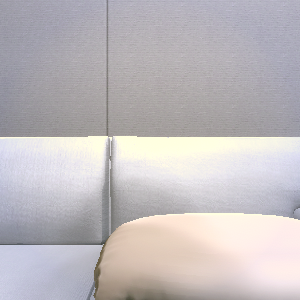

In [40]:
Image.fromarray(tt1.cv2img)

In [ ]:
controller.step(action='Teleport', x=pos['x'], y=pos['y'], z=pos['z'])

In [14]:
ti1 = all_orig_pos.cv2image()

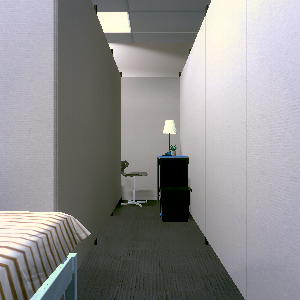

In [16]:
Image.fromarray(ti1)